#Augmented Perspective

This iPython Notebook runs the the Augmented Perspective experiment flow

In [1]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where your augmented perspective repo is checked out
# e.g. 'projects/augmented-perspective':
# if FOLDERNAME, current directory of the iPython notebook will be used
FOLDERNAME = 'augmented-perspective'

assert FOLDERNAME is not None, "[!] Enter the foldername."

%cd drive/My\ Drive
%cd $FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive
/content/drive/.shortcut-targets-by-id/1g15eqMB8VyviBypnBlOVm8H-tu-OksvO/augmented-perspective


Then, you should be able to run the following with no problem.

In [2]:
%load_ext autoreload
%autoreload 2

import importlib
import sys

# pre-import everything to save time
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import torch

!nvidia-smi
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
    torch.cuda.empty_cache()
print("Using {} for computation".format(device))

Sun Dec 24 05:09:07 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
# Try import project libraries
import augmented_perspective
import calibration
import depth_model

Run the depth model with GPU againsts datasets/kitti/images/kitti3.png

In [4]:
importlib.reload(depth_model)
argv = ["runner.py", "--image_path", "datasets/kitti/images/kitti3.png", "--output_path", "outputs", "--device", device]
depth_model.run_depth_model(argv)

before ['/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py', '-f', '/root/.local/share/jupyter/runtime/kernel-f2c663c5-e600-4eaa-ba08-0c28b86e9682.json']
after ['runner.py', '--image_path', 'datasets/kitti/images/kitti3.png', '--output_path', 'outputs', '--device', 'cuda']
Namespace(depth_model=None, image_path='../../datasets/kitti/images', output_path='../../outputs', device='cuda', model_name='mono_1024x320', image_files=['kitti3.png'])
-> Loading model from  models/mono_1024x320
   Loading pretrained encoder


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


   Loading pretrained decoder
Reading images from ../../datasets/kitti/images
-> Predicting on 1 test images
input_image.shape:  torch.Size([1, 3, 320, 1024])
disp.shape:  torch.Size([1, 1, 320, 1024])
disp_resized.shape:  torch.Size([1, 1, 375, 1242])
scaled_disp.shape:  torch.Size([1, 1, 320, 1024])
[[3.374561  3.3937964 3.4327788 ... 2.4334676 2.4196258 2.3985288]
 [3.3395715 3.364002  3.4142675 ... 2.4343112 2.4211686 2.4013295]
 [3.3628972 3.3891952 3.4348993 ... 2.4228578 2.4080575 2.3882763]
 ...
 [1.3745195 1.3792038 1.3857259 ... 1.        1.        1.       ]
 [1.3719953 1.3768369 1.3838501 ... 1.        1.        1.       ]
 [1.3728265 1.3771574 1.3843987 ... 1.        1.        1.       ]]
disp_resized_np.shape:  (375, 1242)
   Processed 1 of 1 images - saved predictions to:
   - ../../outputs/kitti3_monodepth2_depth.png
   - ../../outputs/kitti3_monodepth2_disp.npy
Time taken: 2.58223032951355 seconds
-> Done!
Reading images from ../../datasets/kitti/images
device: cuda
--

Downloading: "https://github.com/facebookresearch/WSL-Images/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://download.pytorch.org/models/ig_resnext101_32x8-c38310e5.pth" to /root/.cache/torch/hub/checkpoints/ig_resnext101_32x8-c38310e5.pth
100%|██████████| 340M/340M [00:01<00:00, 240MB/s]


start processing
processing image 0 : kitti3
	 wholeImage being processed in : 960
Adjust factor is: 1.8210431654676258
Selecting patches ...
Target resolution:  (1056, 3496, 3)
Dynamically change merged-in resolution; scale: 0.35511363636363635
	 Resulted depth map res will be : (375, 1241)
patches to process: 6
	 processing patch 0 | [  0   0 273 273]
	 processing patch 1 | [102   0 273 273]
	 processing patch 2 | [205   0 273 273]
	 processing patch 3 | [307   0 273 273]
	 processing patch 4 | [409   0 273 273]
	 processing patch 5 | [511   0 273 273]
Output size (375, 1241)
Saving depth image (375, 1242) to ../../outputs/kitti3_boosting_depth.png
Saving raw depth data (375, 1242) to ../../outputs/kitti3_boosting_depth_raw.npy
Saving scaled_inverse_depth data (375, 1242) to ../../outputs/kitti3_boosting_depth_inverse.npy
Saving depth data (375, 1242) to ../../outputs/kitti3_boosting_depth.npy
[[730.7845    727.97815   727.3699    ... 572.9416    584.59216
  590.8544   ]
 [728.3245  

In [6]:
original_image = io.imread("datasets/kitti/images/kitti3.png")
depth_image_after_monodepth2 = io.imread("outputs/kitti3_monodepth2_depth.png")
depth_map_after_monodepth2 = np.load("outputs/kitti3_monodepth2_depth.npy")
io.imsave("outputs/kitti3_monodepth2_depth_greyscale.png", depth_map_after_monodepth2.astype("uint8"))
print("Depth Map Size After Monodepth:{}".format(depth_map_after_monodepth2.shape))
depth_image_after_boosting = io.imread("outputs/kitti3_boosting_depth.png")
depth_map_after_boosting = np.load("outputs/kitti3_boosting_depth.npy")
io.imsave("outputs/kitti3_boosting_depth_greyscale.png", depth_map_after_boosting.astype("uint8"))
print("Depth Map Size After Boosting:{}".format(depth_map_after_boosting.shape))

Depth Map Size After Monodepth:(375, 1242)
Depth Map Size After Boosting:(375, 1242)


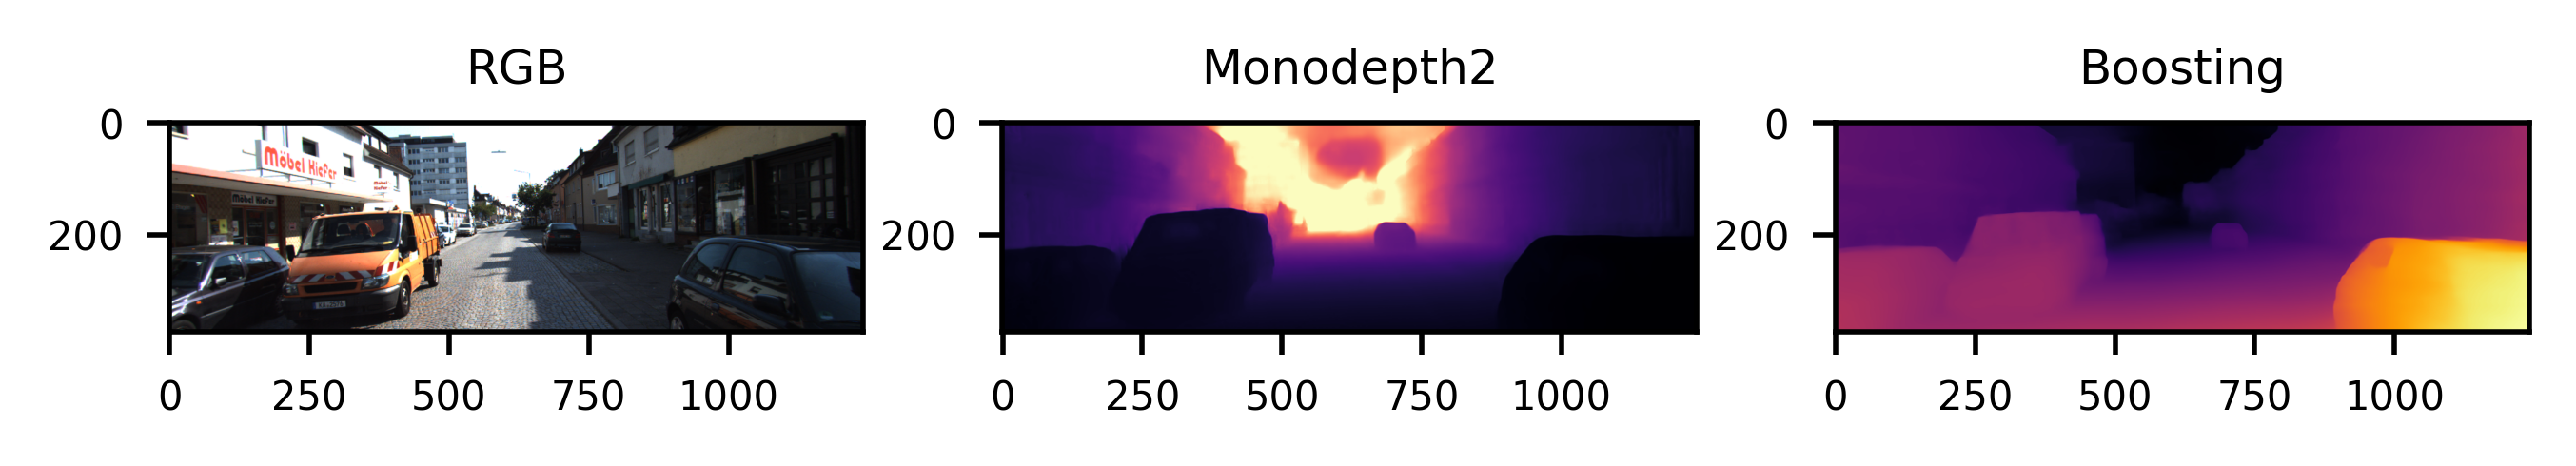

In [7]:
plt.rcParams.update({'font.size': 6})
f, ax = plt.subplots(1, 3, dpi=500)
ax[0].imshow(original_image)
ax[0].title.set_text('RGB')
ax[1].imshow(depth_image_after_monodepth2)
ax[1].title.set_text('Monodepth2')
ax[2].imshow(depth_image_after_boosting)
ax[2].title.set_text('Boosting')

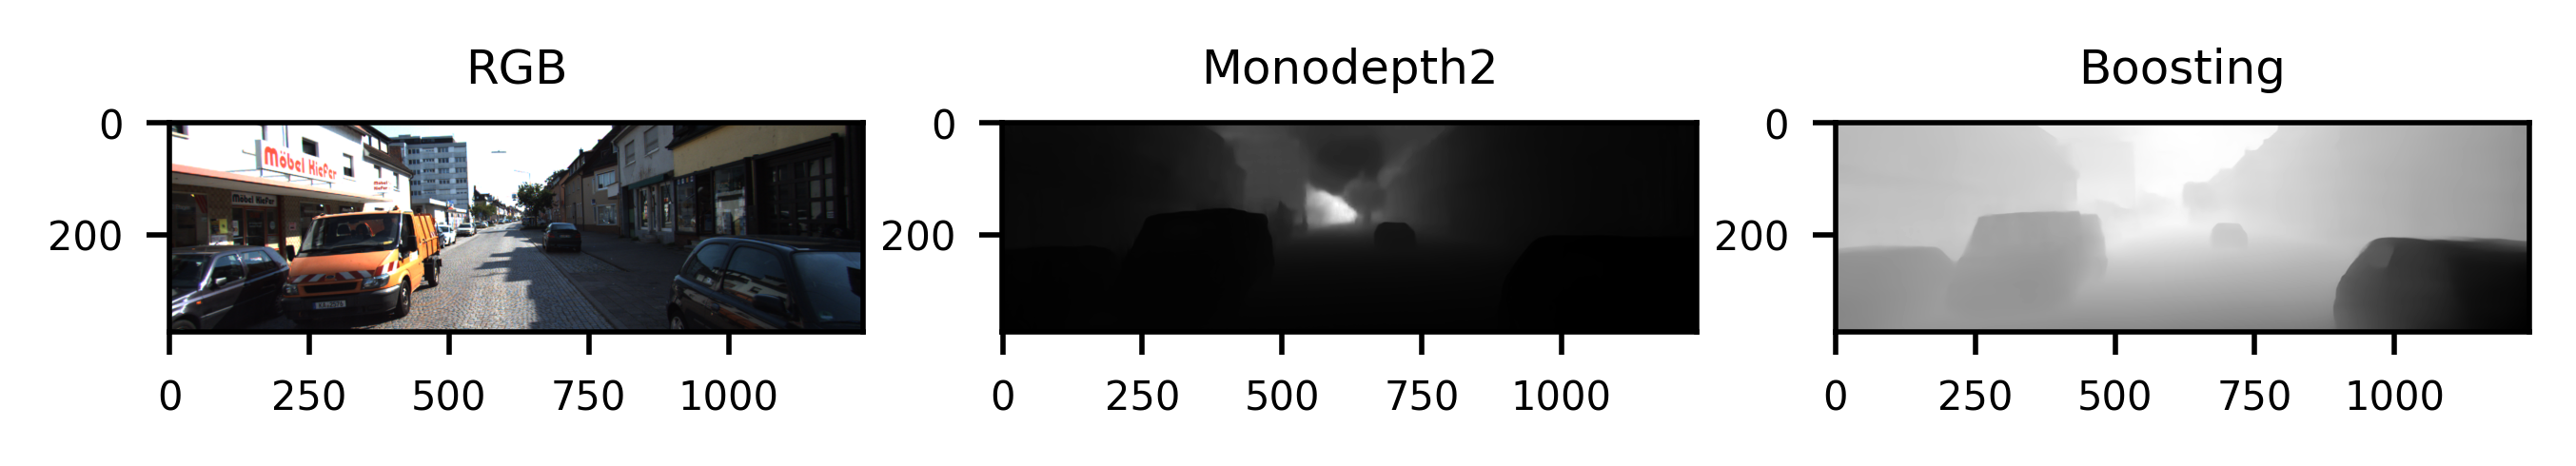

In [10]:
plt.rcParams.update({'font.size': 6})
f, ax = plt.subplots(1, 3, dpi=500)
ax[0].imshow(original_image)
ax[0].title.set_text('RGB')
ax[1].imshow(depth_map_after_monodepth2, cmap='gray')
ax[1].title.set_text('Monodepth2')
ax[2].imshow(depth_map_after_boosting, cmap='gray')
ax[2].title.set_text('Boosting')

Run the augmented perspective code againsts datasets/kitti/images/kitti3.png

In [29]:
importlib.reload(augmented_perspective)
argv = ["runner.py", "--image_path", "datasets/kitti/images/kitti3.png", "--depth_map_path", "outputs/kitti3_monodepth2_depth.npy", "--depth_model", "monodepth2"]
augmented_perspective.run_augmented_perspective(argv)

argv = ["runner.py", "--image_path", "datasets/kitti/images/kitti3.png", "--depth_map_path", "outputs/kitti3_boosting_depth.npy", "--depth_mode", "boosting"]
augmented_perspective.run_augmented_perspective(argv)

2023-12-24 05:55:30.935 INFO     Optional steps for depth mode monodepth2
2023-12-24 05:55:30.937 INFO     Getting intrinsic matrix for datasets/kitti/images/kitti3.png
2023-12-24 05:55:30.949 INFO     Found intrinsic matrix file /content/drive/.shortcut-targets-by-id/1g15eqMB8VyviBypnBlOVm8H-tu-OksvO/augmented-perspective/datasets/kitti/intrinsic_matrices/kitti_calib_cam_to_cam_09_26.txt
2023-12-24 05:55:30.955 INFO     Start re-projection for angles: [15.0]
2023-12-24 05:55:30.956 INFO     [1/1] Start reprojection at 15.0 degree clockwise around b axis
2023-12-24 05:55:30.961 INFO     RT:
[[ 0.96592583  0.          0.25881905 -0.3       ]
 [ 0.          1.          0.          0.        ]
 [-0.25881905  0.          0.96592583  0.        ]
 [ 0.          0.          0.          1.        ]]
2023-12-24 05:55:30.964 INFO     Start reprojection
2023-12-24 05:55:38.711 INFO     Saving image (375, 1242, 3) to outputs/kitti3_monodepth2_reprojected.png
2023-12-24 05:55:47.209 INFO     Saving

In [30]:
reprojected_image_after_boosting = io.imread("outputs/kitti3_boosting_reprojected.png")
reprojected_image_after_monodepth2 = io.imread("outputs/kitti3_monodepth2_reprojected.png")
plt.rcParams.update({'font.size': 6})
f, ax = plt.subplots(1, 3, dpi=500)
ax[0].imshow(original_image)
ax[0].title.set_text('RGB')
ax[1].imshow(reprojected_image_after_monodepth2)
ax[1].title.set_text('Monodepth2')
ax[2].imshow(reprojected_image_after_boosting)
ax[2].title.set_text('Boosting')

Output hidden; open in https://colab.research.google.com to view.

Note that some pixels are unfilled due to stretching effect of the rotation. We can fill them in by approximating with adjacent pixels

In [31]:
reprojected_filled_image_after_boosting = io.imread("outputs/kitti3_boosting_reprojected_filled.png")
reprojected_filled_image_after_monodepth2 = io.imread("outputs/kitti3_monodepth2_reprojected_filled.png")
plt.rcParams.update({'font.size': 6})
f, ax = plt.subplots(1, 3, dpi=500)
ax[0].imshow(original_image)
ax[0].title.set_text('RGB')
ax[1].imshow(reprojected_filled_image_after_boosting)
ax[1].title.set_text('Monodepth2')
ax[2].imshow(reprojected_filled_image_after_monodepth2)
ax[2].title.set_text('Boosting')

Output hidden; open in https://colab.research.google.com to view.

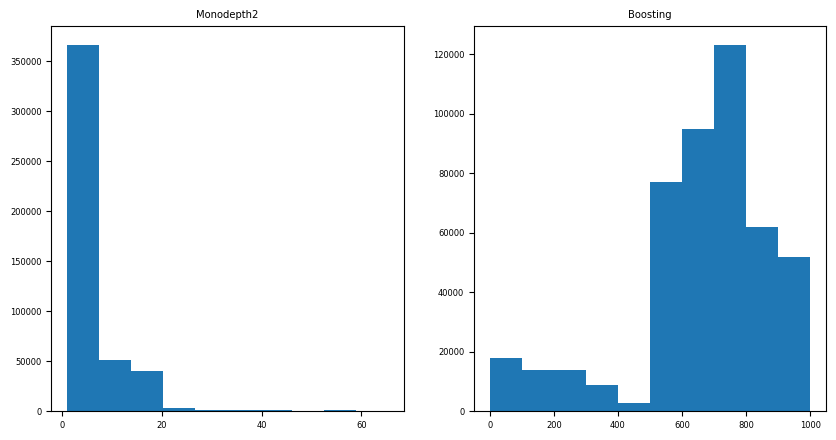

In [32]:
def draw_histogram(ax, data):
    counts, bins = np.histogram(data)
    ax.hist(bins[:-1], bins, weights=counts)

f, ax = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
draw_histogram(ax[0], depth_map_after_monodepth2)
ax[0].title.set_text('Monodepth2')
draw_histogram(ax[1], depth_map_after_boosting)
ax[1].title.set_text('Boosting')

Additional normalization of depth estimation produces better result

monodepth mean=5.600985527038574, std=6.35252046585083, 95th=17.596229076385498
boosting mean=666.251953125, std=217.0662841796875, 95th=963.8529632568359
boosting to monodepth ratio = 54.77610907841308


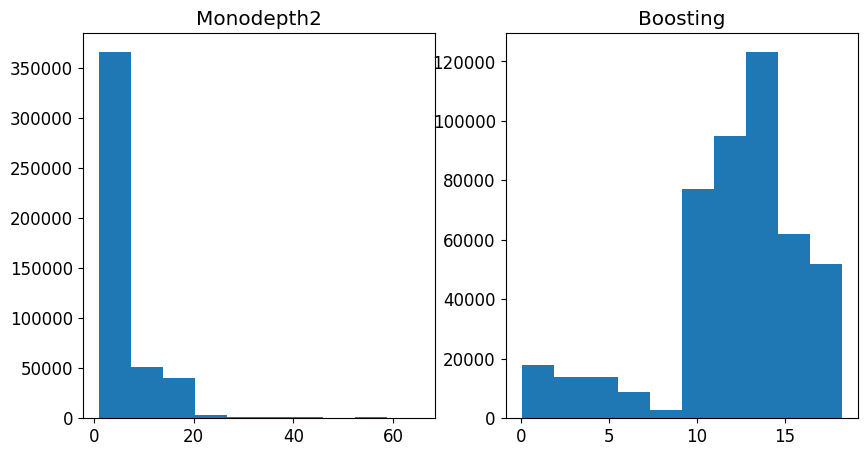

In [34]:
importlib.reload(augmented_perspective)
monodepth_mean = np.mean(depth_map_after_monodepth2)
monodepth_var = np.var(depth_map_after_monodepth2)
monodepth_95th = np.percentile(depth_map_after_monodepth2, 95)
print("monodepth mean={}, std={}, 95th={}".format(monodepth_mean, np.sqrt(monodepth_var), monodepth_95th))
boosting_mean = np.mean(depth_map_after_boosting)
boosting_var = np.var(depth_map_after_boosting)
boosting_95th = np.percentile(depth_map_after_boosting, 95)
print("boosting mean={}, std={}, 95th={}".format(boosting_mean, np.sqrt(boosting_var), boosting_95th))
ratio_between_95th =  boosting_95th / monodepth_95th
print("boosting to monodepth ratio = {}".format(ratio_between_95th))
depth_map_after_monodepth2_normalized = augmented_perspective.normalize_depth_map(depth_map_after_monodepth2, 1)
io.imsave("outputs/kitti3_monodepth2_depth_greyscale_normalized.png", depth_map_after_monodepth2_normalized.astype("uint8"))
depth_map_after_boosting_normalized = augmented_perspective.normalize_depth_map(depth_map_after_boosting, ratio_between_95th)
io.imsave("outputs/kitti3_boosting_depth_greyscale_normalized.png", depth_map_after_boosting_normalized.astype("uint8"))
f, ax = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 12})
draw_histogram(ax[0], depth_map_after_monodepth2_normalized)
ax[0].title.set_text('Monodepth2')
draw_histogram(ax[1], depth_map_after_boosting_normalized)
ax[1].title.set_text('Boosting')

monodepth2
[[3.374561  3.3937964 3.4327788 ... 2.4334676 2.4196258 2.3985288]
 [3.3395715 3.364002  3.4142675 ... 2.4343112 2.4211686 2.4013295]
 [3.3628972 3.3891952 3.4348993 ... 2.4228578 2.4080575 2.3882763]
 ...
 [1.3745195 1.3792038 1.3857259 ... 1.        1.        1.       ]
 [1.3719953 1.3768369 1.3838501 ... 1.        1.        1.       ]
 [1.3728265 1.3771574 1.3843987 ... 1.        1.        1.       ]]
[[13.3413     13.290067   13.278962   ... 10.459699   10.672393
  10.786717  ]
 [13.296391   13.328913   13.346431   ... 10.554122   10.650177
  10.758261  ]
 [13.352227   13.328857   13.3296795  ... 10.578436   10.579683
  10.594615  ]
 ...
 [ 9.57245     9.581542    9.58727    ...  0.03172984  0.02561475
   0.01825614]
 [ 9.556437    9.583831    9.591414   ...  0.02019719  0.02392663
   0.03092311]
 [ 9.606342    9.589892    9.561029   ...  0.03299008  0.04242679
   0.05600078]]
boosting


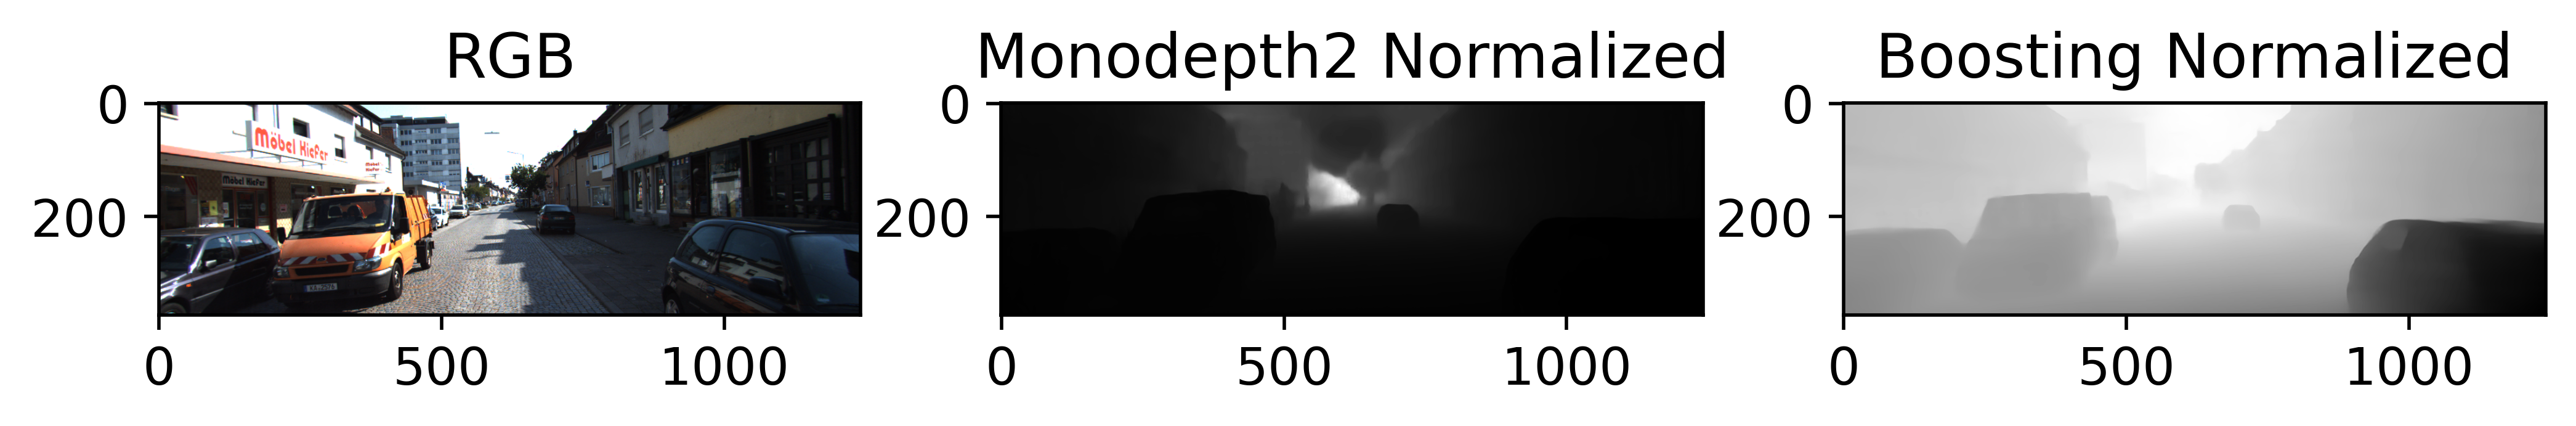

In [36]:
f, ax = plt.subplots(1, 3, dpi=500)
print("monodepth2")
print(depth_map_after_monodepth2_normalized)
print(depth_map_after_boosting_normalized)
print("boosting")
ax[0].imshow(original_image)
ax[0].title.set_text('RGB')
ax[1].imshow(depth_map_after_monodepth2_normalized, cmap='gray')
ax[1].title.set_text('Monodepth2 Normalized')
ax[2].imshow(depth_map_after_boosting_normalized, cmap='gray')
ax[2].title.set_text('Boosting Normalized')

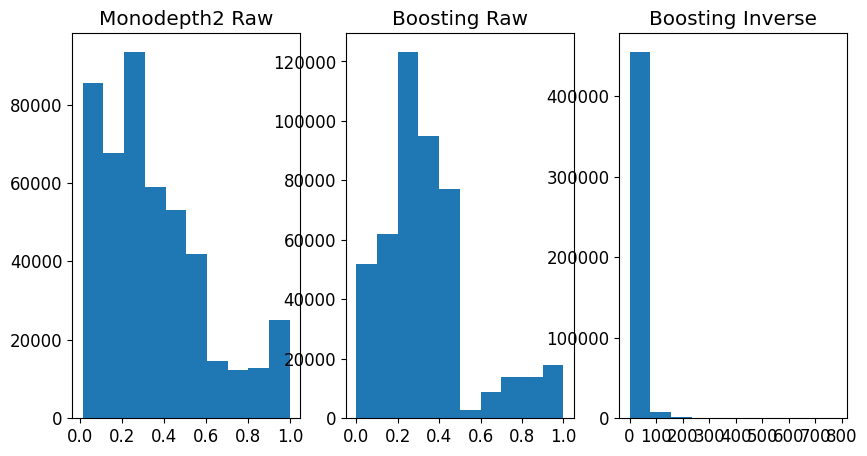

In [38]:
raw_depth_map_after_monodepth2 = np.load("outputs/kitti3_monodepth2_resized_disp.npy")
raw_depth_map_after_boosting = np.load("outputs/kitti3_boosting_depth_raw.npy")
inverse_depth_map_after_boosting = np.load("outputs/kitti3_boosting_depth_inverse.npy")

f, ax = plt.subplots(1, 3)
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 6})
draw_histogram(ax[0], raw_depth_map_after_monodepth2)
ax[0].title.set_text('Monodepth2 Raw')
draw_histogram(ax[1], raw_depth_map_after_boosting)
ax[1].title.set_text('Boosting Raw')
draw_histogram(ax[2], inverse_depth_map_after_boosting)
ax[2].title.set_text('Boosting Inverse')

Now run this against all images in asset/ folder

In [39]:
import os
importlib.reload(depth_model)
argv = ["runner.py", "--image_path", "datasets/kitti/images/", "--output_path", "outputs", "--device", device]
depth_model.run_depth_model(argv)

before ['runner.py', '--image_path', 'datasets/kitti/images/kitti3.png', '--depth_map_path', 'outputs/kitti3_boosting_depth.npy', '--depth_mode', 'boosting']
after ['runner.py', '--image_path', 'datasets/kitti/images/', '--output_path', 'outputs', '--device', 'cuda']
Namespace(depth_model=None, image_path='../../datasets/kitti/images', output_path='../../outputs', device='cuda', model_name='mono_1024x320', image_files=None)
-> Loading model from  models/mono_1024x320
   Loading pretrained encoder


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


   Loading pretrained decoder
Reading images from ../../datasets/kitti/images
-> Predicting on 5 test images
input_image.shape:  torch.Size([1, 3, 320, 1024])
disp.shape:  torch.Size([1, 1, 320, 1024])
disp_resized.shape:  torch.Size([1, 1, 375, 1242])
scaled_disp.shape:  torch.Size([1, 1, 320, 1024])
[[6.1544385 6.139175  6.13938   ... 3.6006696 3.5672865 3.5524173]
 [6.1598825 6.142123  6.1450253 ... 3.6050007 3.5665207 3.5501046]
 [6.170286  6.152243  6.152698  ... 3.627997  3.5890226 3.5726843]
 ...
 [1.8739542 1.8803005 1.8860849 ... 1.8787636 1.8762624 1.8726083]
 [1.8566328 1.8620285 1.8669531 ... 1.8679655 1.8654239 1.8618959]
 [1.848043  1.8527708 1.8575398 ... 1.861763  1.8588506 1.8551463]]
disp_resized_np.shape:  (375, 1242)
   Processed 1 of 5 images - saved predictions to:
   - ../../outputs/kitti1_monodepth2_depth.png
   - ../../outputs/kitti1_monodepth2_disp.npy
Time taken: 0.3800323009490967 seconds
input_image.shape:  torch.Size([1, 3, 320, 1024])
disp.shape:  torch.S

Using cache found in /root/.cache/torch/hub/facebookresearch_WSL-Images_main


start processing
processing image 0 : kitti1
	 wholeImage being processed in : 2304
 	 	 DEBUG| GPU THRESHOLD REACHED 2304 ---> 1568
Adjust factor is: 1.0
Selecting patches ...
Target resolution:  (1391, 4608, 3)
Dynamically change merged-in resolution; scale: 0.2695902228612509
	 Resulted depth map res will be : (375, 1242)
patches to process: 24
	 processing patch 0 | [388   0 362 362]
	 processing patch 1 | [466   0 362 362]
	 processing patch 2 | [543   0 362 362]
	 processing patch 3 | [621   0 362 362]
	 processing patch 4 | [699   0 362 362]
	 processing patch 5 | [776   0 362 362]
	 processing patch 6 | [854   0 362 362]
	 processing patch 7 | [293  60 242 242]
	 processing patch 8 | [457 147 224 224]
	 processing patch 9 | [535 147 224 224]
	 processing patch 10 | [613 147 224 224]
	 processing patch 11 | [690 147 224 224]
	 processing patch 12 | [768 147 224 224]
	 processing patch 13 | [845 147 224 224]
	 processing patch 14 | [923 147 224 224]
	 processing patch 15 | [1001 

Run augmented_perspective with multiple frames produces a video like roation effect as shown in the project README

In [41]:
importlib.reload(augmented_perspective)

common_params = ["--depth_model", "monodepth2", "--angle", "25", "--frames", "30", "--translation", "-0.6", "--scale_ratio", "100"]

argv = ["runner.py", "--image_path", "datasets/kitti/images/kitti1.png", "--depth_map_path", "outputs/kitti1_monodepth2_depth.npy", "--output_path", "kitti1_monodepth2_gif"] + common_params
augmented_perspective.run_augmented_perspective(argv)

argv = ["runner.py", "--image_path", "datasets/kitti/images/kitti2.png", "--depth_map_path", "outputs/kitti2_monodepth2_depth.npy", "--output_path", "kitti2_monodepth2_gif"] + common_params
augmented_perspective.run_augmented_perspective(argv)

argv = ["runner.py", "--image_path", "datasets/kitti/images/kitti3.png", "--depth_map_path", "outputs/kitti3_monodepth2_depth.npy", "--output_path", "kitti3_monodepth2_gif"] + common_params
augmented_perspective.run_augmented_perspective(argv)

argv = ["runner.py", "--image_path", "datasets/kitti/images/kitti4.png", "--depth_map_path", "outputs/kitti4_monodepth2_depth.npy", "--output_path", "kitti4_monodepth2_gif"] + common_params
augmented_perspective.run_augmented_perspective(argv)

argv = ["runner.py", "--image_path", "datasets/kitti/images/kitti5.png", "--depth_map_path", "outputs/kitti5_monodepth2_depth.npy", "--output_path", "kitti5_monodepth2_gif"] + common_params
augmented_perspective.run_augmented_perspective(argv)

2023-12-24 06:33:35.945 INFO     Optional steps for depth mode monodepth2
2023-12-24 06:33:35.947 INFO     Getting intrinsic matrix for datasets/kitti/images/kitti1.png
2023-12-24 06:33:35.958 INFO     Found intrinsic matrix file /content/drive/.shortcut-targets-by-id/1g15eqMB8VyviBypnBlOVm8H-tu-OksvO/augmented-perspective/datasets/kitti/intrinsic_matrices/kitti_calib_cam_to_cam_09_26.txt
2023-12-24 06:33:35.963 INFO     Start re-projection for angles: [ 0.          0.86206897  1.72413793  2.5862069   3.44827586  4.31034483
  5.17241379  6.03448276  6.89655172  7.75862069  8.62068966  9.48275862
 10.34482759 11.20689655 12.06896552 12.93103448 13.79310345 14.65517241
 15.51724138 16.37931034 17.24137931 18.10344828 18.96551724 19.82758621
 20.68965517 21.55172414 22.4137931  23.27586207 24.13793103 25.        ]
2023-12-24 06:33:35.965 INFO     [1/30] Start reprojection at 0.0 degree clockwise around b axis
2023-12-24 06:33:35.969 INFO     RT:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.

You can also create the GIFs with the boosting model

In [42]:
importlib.reload(augmented_perspective)

common_params = ["--depth_model", "boosting", "--angle", "25", "--frames", "30", "--translation", "-0.6", "--scale_ratio", "100"]

argv = ["runner.py", "--image_path", "datasets/kitti/images/kitti1.png", "--depth_map_path", "outputs/kitti1_boosting_depth.npy", "--output_path", "kitti1_boosting_gif"] + common_params
augmented_perspective.run_augmented_perspective(argv)

argv = ["runner.py", "--image_path", "datasets/kitti/images/kitti2.png", "--depth_map_path", "outputs/kitti2_boosting_depth.npy", "--output_path", "kitti2_boosting_gif"] + common_params
augmented_perspective.run_augmented_perspective(argv)

argv = ["runner.py", "--image_path", "datasets/kitti/images/kitti3.png", "--depth_map_path", "outputs/kitti3_boosting_depth.npy", "--output_path", "kitti3_boosting_gif"] + common_params
augmented_perspective.run_augmented_perspective(argv)

argv = ["runner.py", "--image_path", "datasets/kitti/images/kitti4.png", "--depth_map_path", "outputs/kitti4_boosting_depth.npy", "--output_path", "kitti4_boosting_gif"] + common_params
augmented_perspective.run_augmented_perspective(argv)

argv = ["runner.py", "--image_path", "datasets/kitti/images/kitti5.png", "--depth_map_path", "outputs/kitti5_boosting_depth.npy", "--output_path", "kitti5_boosting_gif"] + common_params
augmented_perspective.run_augmented_perspective(argv)

2023-12-24 07:09:59.407 INFO     Optional steps for depth mode boosting
2023-12-24 07:09:59.408 INFO     normalizing with scale_ratio=100.0
2023-12-24 07:09:59.412 INFO     Getting intrinsic matrix for datasets/kitti/images/kitti1.png
2023-12-24 07:09:59.421 INFO     Found intrinsic matrix file /content/drive/.shortcut-targets-by-id/1g15eqMB8VyviBypnBlOVm8H-tu-OksvO/augmented-perspective/datasets/kitti/intrinsic_matrices/kitti_calib_cam_to_cam_09_26.txt
2023-12-24 07:09:59.425 INFO     Start re-projection for angles: [ 0.          0.86206897  1.72413793  2.5862069   3.44827586  4.31034483
  5.17241379  6.03448276  6.89655172  7.75862069  8.62068966  9.48275862
 10.34482759 11.20689655 12.06896552 12.93103448 13.79310345 14.65517241
 15.51724138 16.37931034 17.24137931 18.10344828 18.96551724 19.82758621
 20.68965517 21.55172414 22.4137931  23.27586207 24.13793103 25.        ]
2023-12-24 07:09:59.426 INFO     [1/30] Start reprojection at 0.0 degree clockwise around b axis
2023-12-24 07: